<a href="https://colab.research.google.com/github/SFBayLaser/DeepLearn/blob/develop/PyTorchDataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##New worksheet 

In [0]:
import h5py as h5

Grab the data files to work with

In [2]:
! curl -O https://www.nevis.columbia.edu/~kazuhiro/test.h5 ./
! curl -O https://www.nevis.columbia.edu/~kazuhiro/train.h5 ./

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 71.1M  100 71.1M    0     0  27.8M      0  0:00:02  0:00:02 --:--:-- 27.8M
curl: (6) Could not resolve host: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 70.9M  100 70.9M    0     0  27.0M      0  0:00:02  0:00:02 --:--:-- 27.1M
curl: (6) Could not resolve host: 


Grab our data to look at

In [3]:
f = h5.File('test.h5','r')
print(f)
f.keys()

<HDF5 file "test.h5" (mode r)>


KeysView(<HDF5 file "test.h5" (mode r)>)

In [4]:
for key in f.keys(): print(key)

image0
image1
label


In [5]:
print(f['label'],' ',f['image0'])

<HDF5 dataset "label": shape (20000,), type "<f4">   <HDF5 dataset "image0": shape (20000, 256, 256), type "<f4">


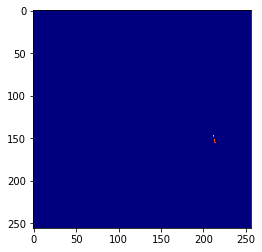

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

image = f['image0'][5]
plt.imshow(image,cmap='jet')
plt.show()

pdgCode: 2212.0


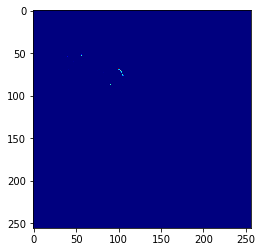

pdgCode: 11.0


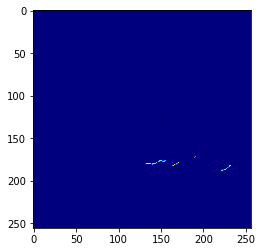

In [7]:
for entry in range(2):
  image = f['image0'][entry]
  label = f['label' ][entry]
  print('pdgCode:',label)
  plt.imshow(image,cmap='jet')
  plt.show()

(1, 4134)
[11. 11. 11. ... 11. 11. 11.]


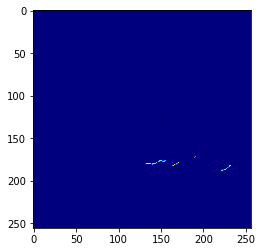

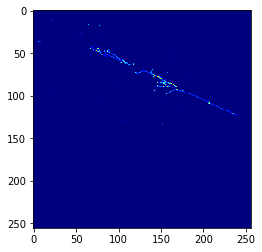

In [8]:
import numpy as np
label    = np.array(f['label'])
location = np.where(label==11)

print(np.shape(location))

#slice image array using "location"
#hint: f['image0'][location]
electron_label = label[location]
print(electron_label)

entries = np.array(location).reshape(-1)
for entry in entries[:2]:
  image = f['image0'][entry]
  plt.imshow(image,cmap='jet')
  plt.show()


## ok... what's next?

20000
0


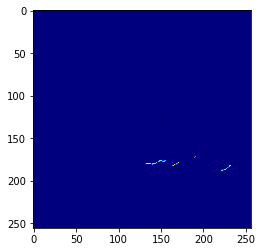

In [18]:
import h5py  as h5
import numpy as np

class dataset:
  def __init__(self,fname):
    self._file=h5.File(fname,'r')
    # Make a map for the labels to/from integers
    self._label={}
    for index, pdgcode in enumerate(np.unique(self._file['label'])):
      self._label[pdgcode] = index
      
  def __len__(self):
    return len(self._file['label'])
  
  def __getitem__(self,index):
    # explicitly define as numpy array to avoid overwrite issues
    image = np.array(self._file['image0'][index])
    label = self._label[self._file['label' ][index]]
    return image,label,index
  
# Test our class and functions
d = dataset('test.h5')
print(len(d))

image,label,index = d[1]
print(label)
plt.imshow(image,cmap='jet')
plt.show()



And now try a data loader... 

3
torch.Size([10, 256, 256])
tensor([18686,  5373, 10184, 14140, 15554,  9766,   561, 14754, 14022, 11464])
entry: 18686 label: 1


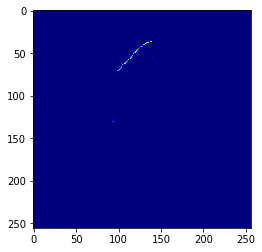

entry: 5373 label: 1


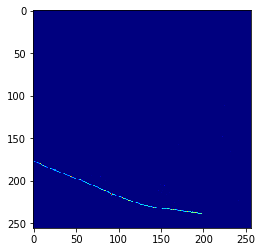

entry: 10184 label: 3


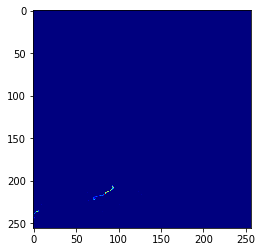

entry: 14140 label: 1


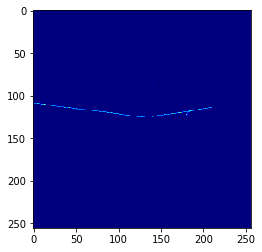

entry: 15554 label: 1


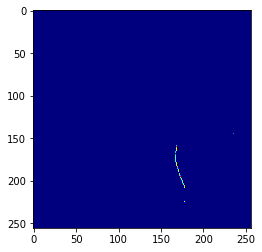

entry: 9766 label: 0


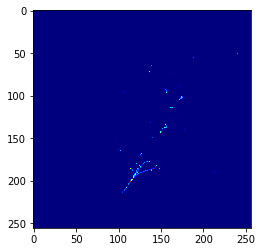

entry: 561 label: 1


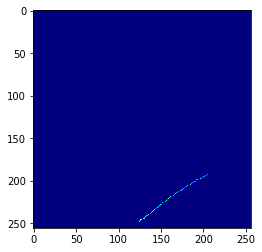

entry: 14754 label: 0


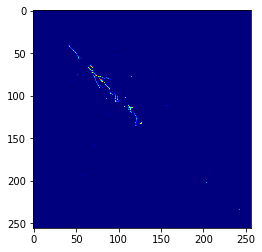

entry: 14022 label: 4


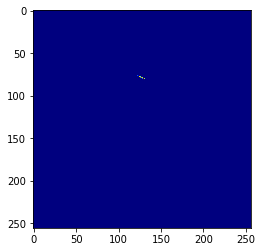

entry: 11464 label: 2


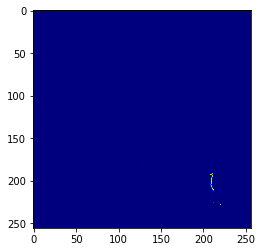

In [25]:
from torch.utils.data import DataLoader

loader = DataLoader(d, batch_size=10, shuffle=True)

batch_data = next(iter(loader))
print(len(batch_data))

image_batch,label_batch,index_batch = next(iter(loader))
print(image_batch.shape)
print(index_batch)

for index, image in enumerate(image_batch):
  label = label_batch[index]
  entry = index_batch[index]
  print('entry:',entry.item(),'label:',label.item())
  plt.imshow(image,cmap='jet')
  plt.show()